In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 


In [2]:
os.chdir(r'D:\PG-DBDA\NumPy & Pandas\ML')

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
from sklearn.feature_selection import mutual_info_classif

In [5]:
X = df[['season',	'yr',	'mnth',	'holiday',	'weekday',	'workingday',	'weathersit',	'temp',	'atemp',	'hum',	'windspeed']] 
y = df['cnt']

In [6]:
mi = mutual_info_classif(X,y)

In [7]:
mi_df = pd.DataFrame({'Feature':X.columns, 'Mutual Information':mi})
mi_df.head()

,Feature,Mutual Information
0,season,0.135480
1,yr,0.750799
2,mnth,0.018473
3,holiday,0.000000
4,weekday,0.320993


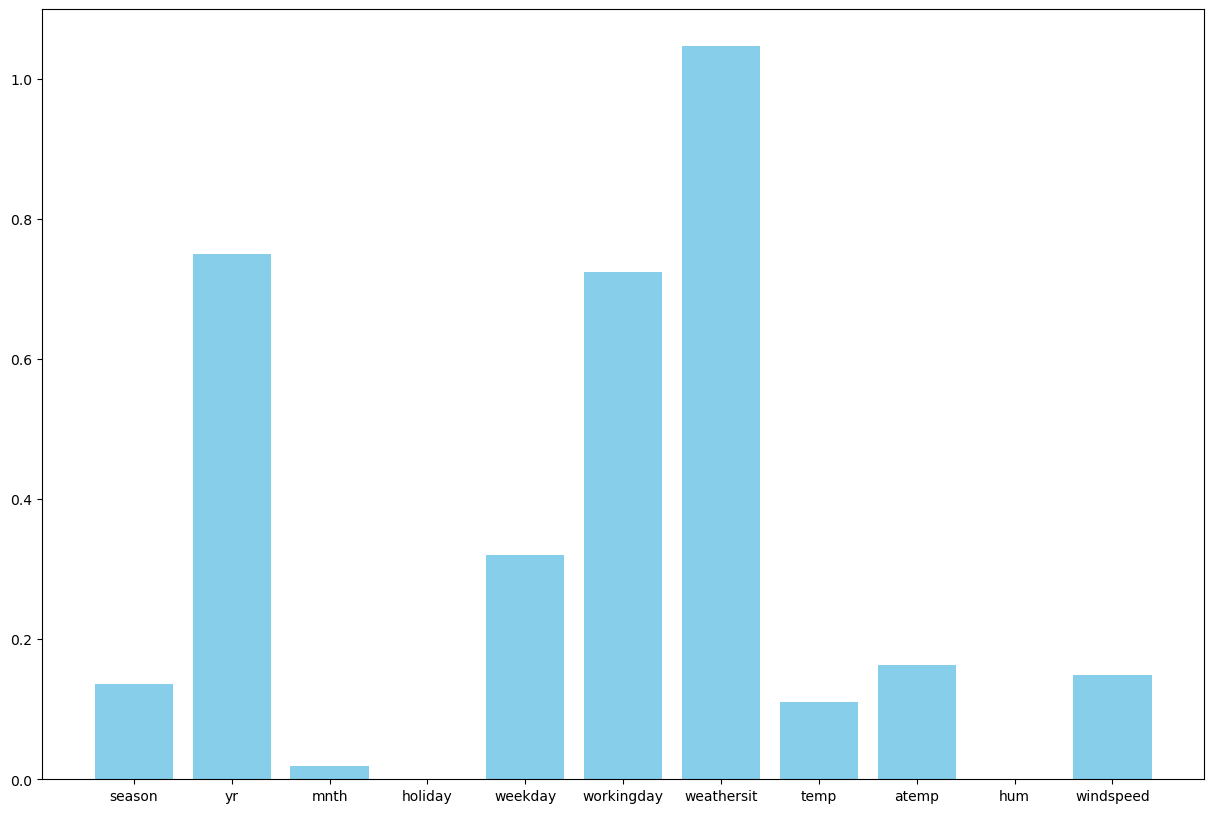

In [8]:
plt.figure(figsize=(15,10))
plt.bar(mi_df['Feature'], mi_df['Mutual Information'], color = 'skyblue')
plt.show()

In [9]:
df = df.drop(['instant','mnth','temp','hum','windspeed','atemp','holiday','casual','registered','dteday'], axis=1)
df.head()

,season,yr,weekday,workingday,weathersit,cnt
0,1,0,1,1,2,985
1,1,0,2,1,2,801
2,1,0,3,1,1,1349
3,1,0,4,1,1,1562
4,1,0,5,1,1,1600


In [10]:
ssn_dum = pd.get_dummies(df['season'],prefix='season',drop_first=True).astype(int)
ssn_dum.head()

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [11]:
ssn_df = df[['yr','weekday','workingday','weathersit','cnt']]

In [12]:
ssn_df = pd.concat([ssn_df,ssn_dum], axis=1)
ssn_df.head()

,yr,weekday,workingday,weathersit,cnt,season_2,season_3,season_4
0,0,1,1,2,985,0,0,0
1,0,2,1,2,801,0,0,0
2,0,3,1,1,1349,0,0,0
3,0,4,1,1,1562,0,0,0
4,0,5,1,1,1600,0,0,0


In [13]:
x_train, x_test, y_train, y_test = train_test_split(ssn_df.drop('cnt',axis=1), ssn_df.cnt,test_size=0.2, random_state=20) 

In [14]:
x_train = sm.add_constant(x_train, prepend=False)

In [15]:
mod = sm.OLS(y_train, x_train).fit()

In [16]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     226.7
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          6.68e-161
Time:                        08:19:03   Log-Likelihood:                -4863.2
No. Observations:                 584   AIC:                             9742.
Df Residuals:                     576   BIC:                             9777.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr          2133.4373     83.583     25.525      0.0

The output is a summary of regression coefficients from a statistical model, likely from an ordinary least squares regression analysis. Here's what we can interpret from the provided coefficients, their standard errors, t-values, and p-values:

1. **Significant Predictors**: 
   - **yr**: Each year is associated with an increase of approximately 2525 in the dependent variable. The p-value (0.000) indicates that this effect is statistically significant.
   - **weekday**: The weekday variable shows a positive impact of about 168.36 on the dependent variable, which is significant (p-value of 0.000).
   - **workingday**: This variable is also positively associated (335.58) with the dependent variable and is statistically significant (p-value of 0.001).
   - **season_2, season_3, and season_4**: All three seasonal variables show significant positive effects on the dependent variable, with season_3 having the largest effect (3791.53), followed by season_4 (2797.23) and season_2 (3145.40), all having p-values of 0.000.

2. **Non-significant Predictor**: 
   - **weathersit**: The coefficient for weathersit (-101.96) is not statistically significant (p-value of 0.147), suggesting that weather conditions do not have a statistically meaningful effect on the dependent variable in this model.

3. **Confidence Intervals**: The 95% confidence intervals for each significant predictor do not include zero, which confirms the significance of these predictors.

Overall, the model suggests that factors such as the year, whether it is a weekday or working day, and the season have significant positive effects on the dependent variable, while weather conditions do not have a significant impact. The model can be useful for predicting the dependent variable based on these predictors.

In [19]:
yr_dum = pd.get_dummies(df['yr'],prefix='year',drop_first=True).astype(int)
yr_dum.head()

,year_1
0,0
1,0
2,0
3,0
4,0


In [20]:
yr_df = df.drop('yr',axis=1)

In [21]:
yr_df = pd.concat([yr_df,yr_dum], axis=1)
yr_df.head()

,season,weekday,workingday,weathersit,cnt,year_1
0,1,1,1,2,985,0
1,1,2,1,2,801,0
2,1,3,1,1,1349,0
3,1,4,1,1,1562,0
4,1,5,1,1,1600,0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(yr_df.drop('cnt',axis=1), yr_df.cnt,test_size=0.2, random_state=20) 

In [23]:
x_train = sm.add_constant(x_train, prepend=False)

In [24]:
mod1 = sm.OLS(y_train, x_train).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     145.3
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           1.02e-99
Time:                        08:19:03   Log-Likelihood:                -5011.8
No. Observations:                 584   AIC:                         1.004e+04
Df Residuals:                     578   BIC:                         1.006e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       692.5720     48.611     14.247      0.0

The coefficients provided in the table indicate the estimated effect of each predictor variable on the dependent variable in a regression model. Here's a brief interpretation of each coefficient:

1. **Season**: An increase of 1 unit in the season variable corresponds to an increase in the dependent variable by approximately 1038.76 units. The effect is statistically significant with a very low p-value (0.000).

2. **Weekday**: A 1 unit increase in the weekday variable is associated with an increase of about 164.76 units in the dependent variable. This effect is also significant (p-value = 0.000).

3. **Working Day**: This variable has a positive coefficient of 317.51, indicating that on working days, the dependent variable increases by this amount. The statistical significance is confirmed with a p-value of 0.012.

4. **Weather Situation (weathersit)**: A 1 unit increase in the weathersit variable is linked to a decrease of approximately 191.95 units in the dependent variable. This effect is statistically significant (p-value = 0.031).

5. **Year_1**: The coefficient of 2537.77 suggests that being in the year represented by this variable leads to an increase of about 2537.77 units in the dependent variable. This is highly significant (p-value = 0.000).


In [55]:
wkday_dum = pd.get_dummies(df['weekday'], prefix='weekday', drop_first=True).astype(int) 
wkday_dum.head()

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [57]:
wk_df = df.drop('weekday',axis=1)

In [59]:
wk_df = pd.concat([wk_df,wkday_dum],axis=1)
wk_df.head()

,season,yr,workingday,weathersit,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,1,2,985,1,0,0,0,0,0
1,1,0,1,2,801,0,1,0,0,0,0
2,1,0,1,1,1349,0,0,1,0,0,0
3,1,0,1,1,1562,0,0,0,1,0,0
4,1,0,1,1,1600,0,0,0,0,1,0


In [61]:
x_train, x_test, y_train, y_test = train_test_split(wk_df.drop('cnt',axis=1), wk_df.cnt,test_size=0.2, random_state=20) 

In [63]:
x_train = sm.add_constant(x_train, prepend=False)

In [65]:
mod2 = sm.OLS(y_train,x_train).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     74.79
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           3.64e-97
Time:                        08:25:43   Log-Likelihood:                -5005.6
No. Observations:                 584   AIC:                         1.003e+04
Df Residuals:                     573   BIC:                         1.008e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       689.7829     48.343     14.269      0.0

| Predictor Variable | Coefficient | Interpretation |
|--------------------|-------------|----------------|
| **Season** | 689.78 | An increase of 1 unit in the season variable corresponds to an increase in the dependent variable by approximately 689.78 units. The effect is statistically significant with a p-value of 0.000. |
| **Year (yr)** | 2146.23 | A 1 unit increase in the year variable is associated with an increase of about 2146.23 units in the dependent variable. This effect is highly significant (p-value = 0.000). |
| **Working Day** | 688.67 | This variable has a positive coefficient of 688.67, indicating that on working days, the dependent variable increases by this amount. The effect is marginally significant (p-value = 0.056). |
| **Weather Situation (weathersit)** | -1019.64 | A 1 unit increase in the weather situation variable is linked to a decrease of approximately 1019.64 units in the dependent variable. This effect is statistically significant (p-value = 0.000). |
| **Weekday_1** | -1223.28 | An increase of 1 unit in this variable is associated with a decrease of about 1223.28 units in the dependent variable. This effect is significant (p-value = 0.003). |
| **Weekday_2** | -1185.82 | A 1 unit increase in this variable is associated with a decrease of about 1185.82 units in the dependent variable. This effect is significant (p-value = 0.003). |
| **Weekday_3** | -872.99 | An increase of 1 unit in this variable corresponds to a decrease in the dependent variable by approximately 872.99 units. This effect is statistically significant (p-value = 0.021). |
| **Weekday_4** | -824.18 | A 1 unit increase in this variable is linked to a decrease of about 824.18 units in the dependent variable. This effect is significant (p-value = 0.045). |
| **Weekday_5** | -855.30 | An increase of 1 unit in this variable corresponds to a decrease in the dependent variable by approximately 855.30 units. This effect is statistically significant (p-value = 0.036). |
| **Weekday_6** | -15.77 | This variable has a coefficient of -15.77, indicating a negligible change in the dependent variable. The effect is not statistically significant (p-value = 0.936). |
| **Constant (const)** | 3362.87 | The intercept term in the regression model is 3362.87, which represents the baseline level of the dependent variable when all predictors are zero. This effect is highly significant (p-value = 0.000). |


In [67]:
df.head()

,season,yr,weekday,workingday,weathersit,cnt
0,1,0,1,1,2,985
1,1,0,2,1,2,801
2,1,0,3,1,1,1349
3,1,0,4,1,1,1562
4,1,0,5,1,1,1600


In [69]:
wrkng_dum = pd.get_dummies(df['workingday'],prefix='workingDay', drop_first=True).astype(int) 
wrkng_dum.head()

,workingDay_1
0,1
1,1
2,1
3,1
4,1


In [71]:
wrkng_df = df.drop('workingday', axis=1)

In [73]:
wrkng_df = pd.concat([wrkng_df,wrkng_dum],axis=1)
wrkng_df.head()

,season,yr,weekday,weathersit,cnt,workingDay_1
0,1,0,1,2,985,1
1,1,0,2,2,801,1
2,1,0,3,1,1349,1
3,1,0,4,1,1562,1
4,1,0,5,1,1600,1


In [81]:
x_train, x_test, y_train, y_test = train_test_split(wrkng_df.drop('cnt',axis=1), wrkng_df.cnt, test_size=0.2, random_state=20)

In [83]:
x_train = sm.add_constant(x_train,prepend=False)

In [85]:
mod3 = sm.OLS(y_train,x_train).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     145.3
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           1.02e-99
Time:                        08:36:32   Log-Likelihood:                -5011.8
No. Observations:                 584   AIC:                         1.004e+04
Df Residuals:                     578   BIC:                         1.006e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
season         692.5720     48.611     14.247   

| Predictor Variable | Coefficient | Interpretation |
|--------------------|-------------|----------------|
| **Season** | 692.57 | An increase of 1 unit in the season variable corresponds to an increase in the dependent variable by approximately 692.57 units. The effect is statistically significant with a p-value of 0.000. |
| **Year (yr)** | 2132.29 | A 1 unit increase in the year variable is associated with an increase of about 2132.29 units in the dependent variable. This effect is highly significant (p-value = 0.000). |
| **Weekday** | 37.21 | This variable has a coefficient of 37.21, indicating a negligible change in the dependent variable. The effect is not statistically significant (p-value = 0.161). |
| **Weather Situation (weathersit)** | -1008.07 | A 1 unit increase in the weather situation variable is linked to a decrease of approximately 1008.07 units in the dependent variable. This effect is statistically significant (p-value = 0.000). |
| **WorkingDay_1** | -225.52 | An increase of 1 unit in this variable corresponds to a decrease in the dependent variable by approximately 225.52 units. This effect is marginally significant (p-value = 0.052). |
| **Constant (const)** | 3154.89 | The intercept term in the regression model is 3154.89, which represents the baseline level of the dependent variable when all predictors are zero. This effect is highly significant (p-value = 0.000). |


In [91]:
df.head()

,season,yr,weekday,workingday,weathersit,cnt
0,1,0,1,1,2,985
1,1,0,2,1,2,801
2,1,0,3,1,1,1349
3,1,0,4,1,1,1562
4,1,0,5,1,1,1600
